In [1]:
pip install geopy


In [2]:
from geopy.geocoders import Nominatim

In [3]:
geolocator=Nominatim(user_agent="my-app")
location=geolocator.geocode("Nagpur")
ngp=(location.latitude,location.longitude)

In [4]:
from geopy.distance import geodesic

In [5]:
location=geolocator.geocode("Wardha")
am=(location.latitude,location.longitude)

In [6]:
ngp

(21.1498134, 79.0820556)

In [7]:
am

(20.735706399999998, 78.55649896377687)

In [8]:
d=geodesic(ngp,am).miles

In [9]:
d

44.331742112768666

In [10]:
cities=["Nagpur","Mumbai","Pune","Wardha"]

In [11]:
city_location=list();

In [12]:
for i in cities:
  location=geolocator.geocode(i)
  city_location.append((location.latitude,location.longitude))

In [13]:
city_location

[(21.1498134, 79.0820556),
 (18.9733536, 72.82810491917377),
 (18.521428, 73.8544541),
 (20.735706399999998, 78.55649896377687)]

In [14]:
import numpy as np


In [15]:
l=[]
min=0
for i in range(len(cities)):
  d=[]
  for j in range(len(cities)):
    a=city_location[i]
    b=city_location[j]
    dist=geodesic(a,b).miles
    d.append(dist)
  l.append(d)

In [16]:
l

[[0.0, 433.1425428591388, 385.2763086761522, 44.331742112768666],
 [433.1425428591388, 0.0, 74.08556960975572, 392.00545142613885],
 [385.2763086761522, 74.08556960975572, 0.0, 342.1900466220114],
 [44.331742112768666, 392.00545142613885, 342.1900466220114, 0.0]]

In [17]:
mincost=float("inf")
min=tuple()
n=4
for i in range(1,n):
  for j in range(i):
    t_d=l[i][j]
    if(t_d<mincost):
      mincost=t_d
      min=(i,j)

In [18]:
min

(3, 0)

In [19]:
p=min[0]
q=min[1]

In [20]:
near=[0]*n
for i in range(4):
  if(l[p][i]<l[q][i]):
    near[i]=p
  else:
    near[i]=l
near[p]=near[q]=0;

In [21]:
tree=[ [0]*3 for i in range(n-1)]
tree[0]=[min[0],min[1],mincost]

for i in range(1,n-1):
  j=0
  tmp=float("inf")
  for k in range(len(near)):
    if(near[k]!=0 and l[k][near[k]]<tmp):
      j=k
  tree[i][0]=near[j]
  tree[i][1]=j
  tree[i][2]=l[near[j]][j]
  mincost+=l[near[j]][j]
  near[j]=0

  for k in range(n):
    if(near[k]!=0 and l[k][j]<l[k][near[k]]):
      near[k]=j



In [22]:
mincost

460.6073583445358

In [23]:
tree

[[3, 0, 44.331742112768666],
 [3, 2, 342.1900466220114],
 [2, 1, 74.08556960975572]]

In [50]:
def prim(cities):
  n=len(cities)

  city_location=list();
  for i in cities:
    location=geolocator.geocode(i, timeout=None)
    city_location.append((location.latitude,location.longitude))
  l=[]
  min=0
  for i in range(n):
    d=[]
    for j in range(n):
      a=city_location[i]
      b=city_location[j]
      dist=geodesic(a,b).miles
      if(i==j):
        dist=float("inf")
      d.append(dist)
    #print(d)
    l.append(d)
  #print(l)
  mincost=float("inf")
  min=tuple()

  for i in range(1,n):
    for j in range(i):
      t_d=l[i][j]
      if(t_d<mincost):
        mincost=t_d
        min=(i,j)
  p=min[0]
  q=min[1]
  near=[0]*n
  for i in range(n):
    if(l[p][i]<l[q][i]):
      near[i]=p
    else:
      near[i]=q
  near[p]=near[q]="visited";
  tree=[ [0]*3 for i in range(n-1)]

  tree[0]=[min[0],min[1],mincost]

  for i in range(1,n-1):
    j=0
    tmp=float("inf")
    for k in range(len(near)):
      if(near[k]!="visited" and l[k][near[k]]<tmp):
        j=k
    tree[i][0]=near[j]
    tree[i][1]=j
    tree[i][2]=l[near[j]][j]
    mincost+=l[near[j]][j]
    near[j]="visited"

    for k in range(n):
      if(near[k]!="visited" and l[k][j]<l[k][near[k]]):
        near[k]=j
  return mincost,l,tree

In [25]:
prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati'])

(477.8210838662118,
 matrix([[         inf, 433.14254286, 385.27630868,  44.33174211,
           83.59659509],
         [433.14254286,          inf,  74.08556961, 392.00545143,
          351.57987834],
         [385.27630868,  74.08556961,          inf, 342.19004662,
          307.64437068],
         [ 44.33174211, 392.00545143, 342.19004662,          inf,
           51.75940147],
         [ 83.59659509, 351.57987834, 307.64437068,  51.75940147,
                   inf]]),
 [[3, 0, 44.331742112768666],
  [3, 4, 51.75940146716625],
  [4, 2, 307.64437067652113],
  [2, 1, 74.08556960975572]])

In [26]:
import matplotlib.pyplot as plt

In [37]:
same_state=[]
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur','Nashik'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur','Nashik','Aurangabad'])[0])

In [38]:
diff_state=[]
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi','Bangalore'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi','Bangalore','Kolkata'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi','Bangalore','Kolkata','Hyderabad'])[0])

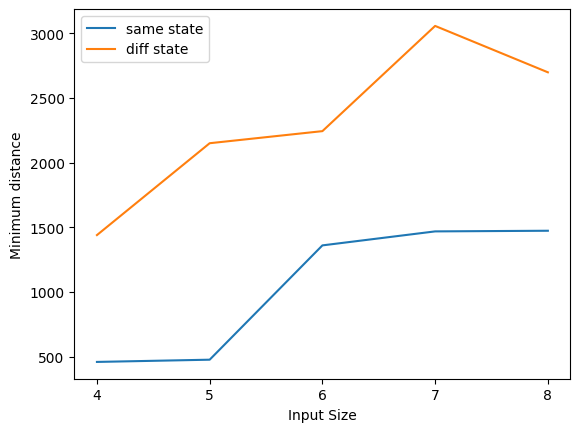

In [51]:
plt.plot(same_state, label='same state')
plt.plot(diff_state, label='diff state')
plt.xlabel('Input Size')
plt.ylabel('Minimum distance')
plt.xticks([0,1,2,3,4],['4','5','6','7','8'])
plt.legend()
plt.show()

In [32]:
import networkx as nx

In [97]:
G = nx.Graph()
G_min=nx.Graph()

In [81]:
x,y,z=prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha'])

In [82]:
citites=['Nagpur', 'Mumbai', 'Pune', 'Wardha']

In [112]:
for i in range(1,n):
    for j in range(i):
      G.add_edge(cities[i],cities[j],weight=round(y[i][j],2))

In [84]:
pos = nx.spring_layout(G, seed=4)

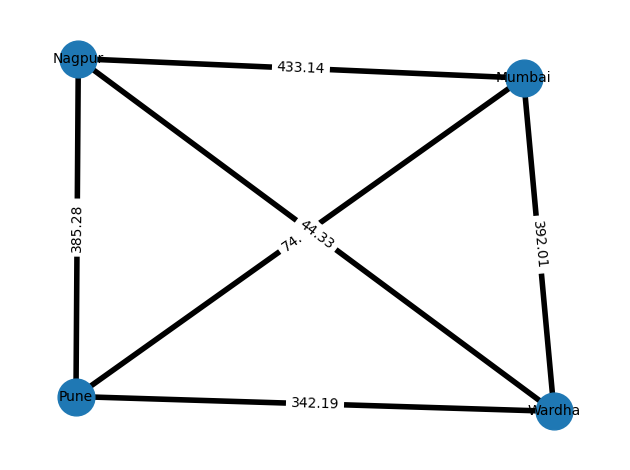

In [99]:
e = [(u, v) for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=e, width=4)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


{('Wardha',
  'Nagpur'): Text(-0.023680365110499754, 0.5838941978056047, '44.33'),
 ('Wardha', 'Pune'): Text(0.001433478276677334, -0.0355506361181257, '342.19'),
 ('Pune', 'Mumbai'): Text(0.02368036511050026, -0.5838941978056045, '74.09')}

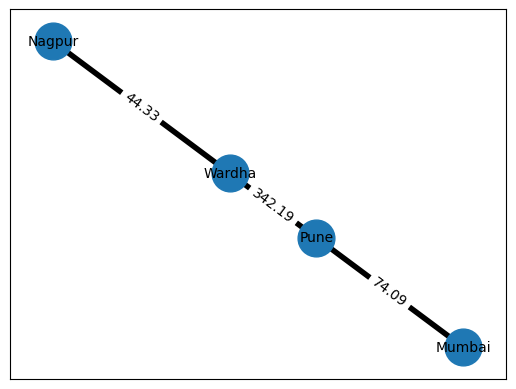

In [91]:
for i in z:
  G_min.add_edge(cities[i[0]],cities[i[1]],weight=round(i[2],2))
pos_min = nx.spring_layout(G_min, seed=4)
e_min = [(u, v) for (u, v, d) in G_min.edges(data=True)]
nx.draw_networkx_nodes(G_min, pos_min, node_size=700)
nx.draw_networkx_edges(G_min, pos_min, edgelist=e_min, width=4)
nx.draw_networkx_labels(G_min, pos_min, font_size=10, font_family="sans-serif")
edge_labels_min = nx.get_edge_attributes(G_min, "weight")
nx.draw_networkx_edge_labels(G_min, pos_min, edge_labels_min)

In [113]:
def draw_graph(cities):
  G = nx.Graph()

  x,y,z=prim(cities)
  n=len(y[0])
  for i in range(1,n):
    for j in range(i):
      G.add_edge(cities[i],cities[j],weight=y[i][j])
  pos = nx.spring_layout(G, seed=n)
  e = [(u, v) for (u, v, d) in G.edges(data=True)]
  nx.draw_networkx_nodes(G, pos, node_size=700)
  nx.draw_networkx_edges(G, pos, edgelist=e, width=4)
  nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


In [114]:
def draw_mst(cities):
    G_min=nx.Graph()
    x,y,z=prim(cities)
    n=len(y[0])
    for i in z:
      G_min.add_edge(cities[i[0]],cities[i[1]],weight=round(i[2],2))
    pos_min = nx.spring_layout(G_min, seed=4)
    e_min = [(u, v) for (u, v, d) in G_min.edges(data=True)]
    nx.draw_networkx_nodes(G_min, pos_min, node_size=700)
    nx.draw_networkx_edges(G_min, pos_min, edgelist=e_min, width=4)
    nx.draw_networkx_labels(G_min, pos_min, font_size=10, font_family="sans-serif")
    edge_labels_min = nx.get_edge_attributes(G_min, "weight")
    nx.draw_networkx_edge_labels(G_min, pos_min, edge_labels_min)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [115]:
def draw(cities):
  draw_graph(cities)
  draw_mst(cities)


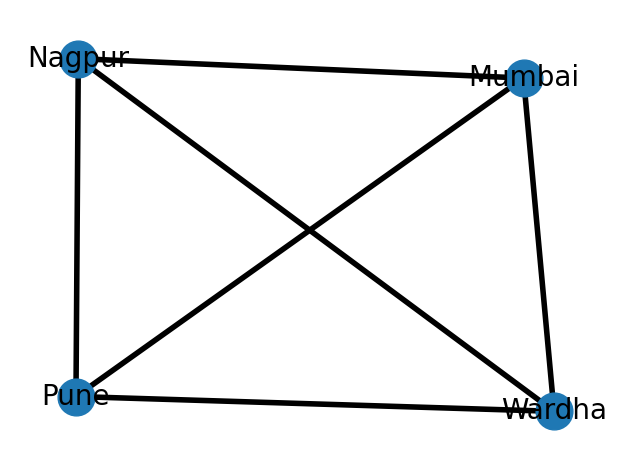

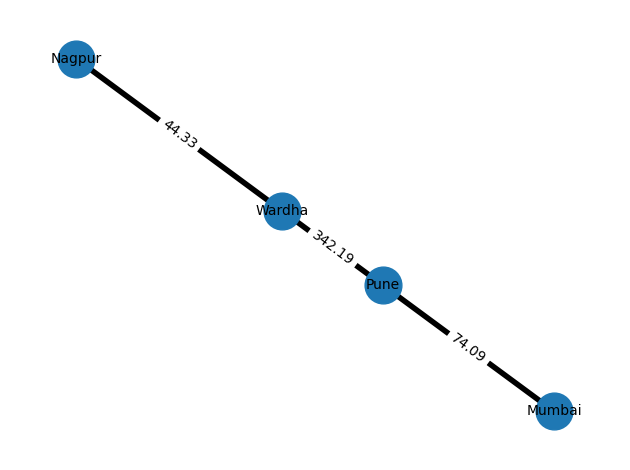

In [116]:
draw(['Nagpur', 'Mumbai', 'Pune', 'Wardha'])

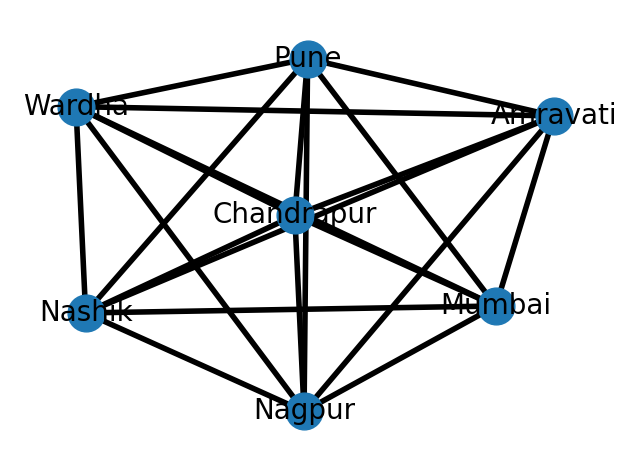

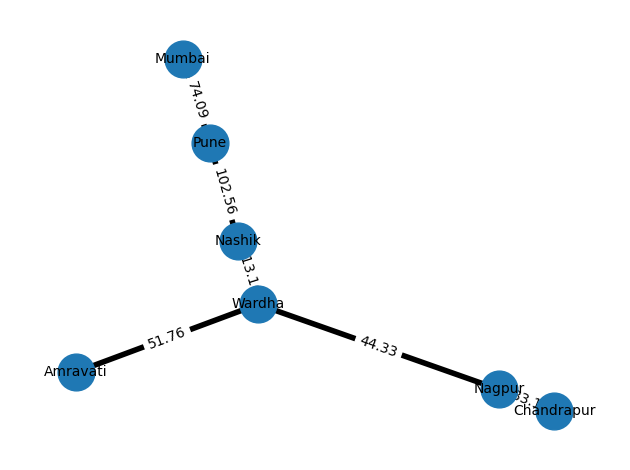

In [117]:
draw(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur','Nashik'])